In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torchvision import transforms as T

import torch.optim as optim

from models.s8 import Net
from utils import build_cifar, Trainer, plot_sampledata, plot_misclassified

# Load Data

In [ ]:
# Train data transformations
train_transforms = T.Compose(
    [
        T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        T.RandomRotation((-5.0, 5.0), fill=(0.49139968, 0.48215841, 0.44653091)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(
            (0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784)
        ),
    ]
)

# Test data transformations
test_transforms = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

batch_size = 64

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_cifar(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_cifar(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 170498071/170498071 [00:13<00:00, 12864541.66it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


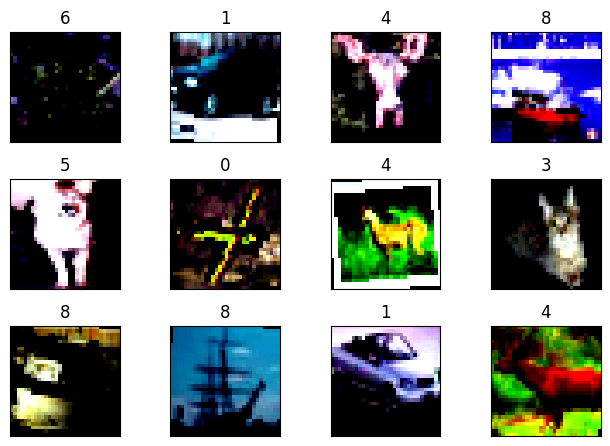

In [ ]:
plot_sampledata(train_loader)

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net(norm="gn").to(device)

In [ ]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 8, 32, 32]            216
│    └─ReLU: 2-2                         [1, 8, 32, 32]            --
│    └─GroupNorm: 2-3                    [1, 8, 32, 32]            16
│    └─Dropout2d: 2-4                    [1, 8, 32, 32]            --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           1,152
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-7                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 8, 16, 16]            --
│    └─Conv2d: 2-9                       [1, 8, 32, 32]            128
│    └─ReLU: 2-10                        [1, 8, 32, 32]            --
│    └─Dro

In [ ]:
num_epochs = 20
model = Net(drop=0.025, norm="gn").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.01, epochs=num_epochs, steps_per_epoch=len(train_loader)
)
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=1.6208 Batch_id=781 Accuracy=24.78: 100%|██████████| 782/782 [00:53<00:00, 14.72it/s]


Test set: Average loss: 1.8757, Accuracy: 3217/10000 (32.17%)

Epoch 2


Train: Loss=1.3570 Batch_id=781 Accuracy=37.57: 100%|██████████| 782/782 [00:53<00:00, 14.61it/s]


Test set: Average loss: 1.5829, Accuracy: 4176/10000 (41.76%)

Epoch 3


Train: Loss=1.5494 Batch_id=781 Accuracy=44.51: 100%|██████████| 782/782 [00:52<00:00, 14.98it/s]


Test set: Average loss: 1.3420, Accuracy: 5116/10000 (51.16%)

Epoch 4


Train: Loss=1.3141 Batch_id=781 Accuracy=50.01: 100%|██████████| 782/782 [00:53<00:00, 14.54it/s]


Test set: Average loss: 1.2241, Accuracy: 5558/10000 (55.58%)

Epoch 5


Train: Loss=1.6233 Batch_id=781 Accuracy=55.21: 100%|██████████| 782/782 [00:52<00:00, 15.04it/s]


Test set: Average loss: 1.1472, Accuracy: 5889/10000 (58.89%)

Epoch 6


Train: Loss=0.9183 Batch_id=781 Accuracy=58.09: 100%|██████████| 782/782 [00:51<00:00, 15.08it/s]


Test set: Average loss: 1.0849, Accuracy: 6136/10000 (61.36%)

Epoch 7


Train: Loss=0.8088 Batch_id=781 Accuracy=60.36: 100%|██████████| 782/782 [00:53<00:00, 14.55it/s]


Test set: Average loss: 0.9846, Accuracy: 6524/10000 (65.24%)

Epoch 8


Train: Loss=0.8180 Batch_id=781 Accuracy=62.38: 100%|██████████| 782/782 [00:52<00:00, 14.98it/s]


Test set: Average loss: 0.9480, Accuracy: 6645/10000 (66.45%)

Epoch 9


Train: Loss=0.9999 Batch_id=781 Accuracy=63.54: 100%|██████████| 782/782 [00:51<00:00, 15.05it/s]


Test set: Average loss: 0.9078, Accuracy: 6786/10000 (67.86%)

Epoch 10


Train: Loss=1.0065 Batch_id=781 Accuracy=64.54: 100%|██████████| 782/782 [00:53<00:00, 14.58it/s]


Test set: Average loss: 0.9289, Accuracy: 6718/10000 (67.18%)

Epoch 11


Train: Loss=0.9164 Batch_id=781 Accuracy=65.71: 100%|██████████| 782/782 [00:52<00:00, 14.88it/s]


Test set: Average loss: 0.8709, Accuracy: 6930/10000 (69.30%)

Epoch 12


Train: Loss=1.2423 Batch_id=781 Accuracy=66.56: 100%|██████████| 782/782 [00:53<00:00, 14.60it/s]


Test set: Average loss: 0.8454, Accuracy: 7062/10000 (70.62%)

Epoch 13


Train: Loss=1.1669 Batch_id=781 Accuracy=67.40: 100%|██████████| 782/782 [00:52<00:00, 14.96it/s]


Test set: Average loss: 0.8133, Accuracy: 7137/10000 (71.37%)

Epoch 14


Train: Loss=0.5353 Batch_id=781 Accuracy=68.65: 100%|██████████| 782/782 [00:52<00:00, 14.90it/s]


Test set: Average loss: 0.8123, Accuracy: 7152/10000 (71.52%)

Epoch 15


Train: Loss=0.6078 Batch_id=781 Accuracy=69.05: 100%|██████████| 782/782 [00:52<00:00, 15.00it/s]


Test set: Average loss: 0.7859, Accuracy: 7253/10000 (72.53%)

Epoch 16


Train: Loss=1.2877 Batch_id=781 Accuracy=69.38: 100%|██████████| 782/782 [00:53<00:00, 14.64it/s]


Test set: Average loss: 0.7741, Accuracy: 7278/10000 (72.78%)

Epoch 17


Train: Loss=1.1142 Batch_id=781 Accuracy=70.18: 100%|██████████| 782/782 [00:52<00:00, 15.03it/s]


Test set: Average loss: 0.7508, Accuracy: 7359/10000 (73.59%)

Epoch 18


Train: Loss=0.8909 Batch_id=781 Accuracy=71.11: 100%|██████████| 782/782 [00:52<00:00, 15.02it/s]


Test set: Average loss: 0.7402, Accuracy: 7419/10000 (74.19%)

Epoch 19


Train: Loss=1.0958 Batch_id=781 Accuracy=71.35: 100%|██████████| 782/782 [00:54<00:00, 14.45it/s]


Test set: Average loss: 0.7331, Accuracy: 7417/10000 (74.17%)

Epoch 20


Train: Loss=0.3657 Batch_id=781 Accuracy=71.73: 100%|██████████| 782/782 [00:50<00:00, 15.47it/s]


Test set: Average loss: 0.7320, Accuracy: 7435/10000 (74.35%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 71.73@20		71.73
test	 74.35@20		74.35


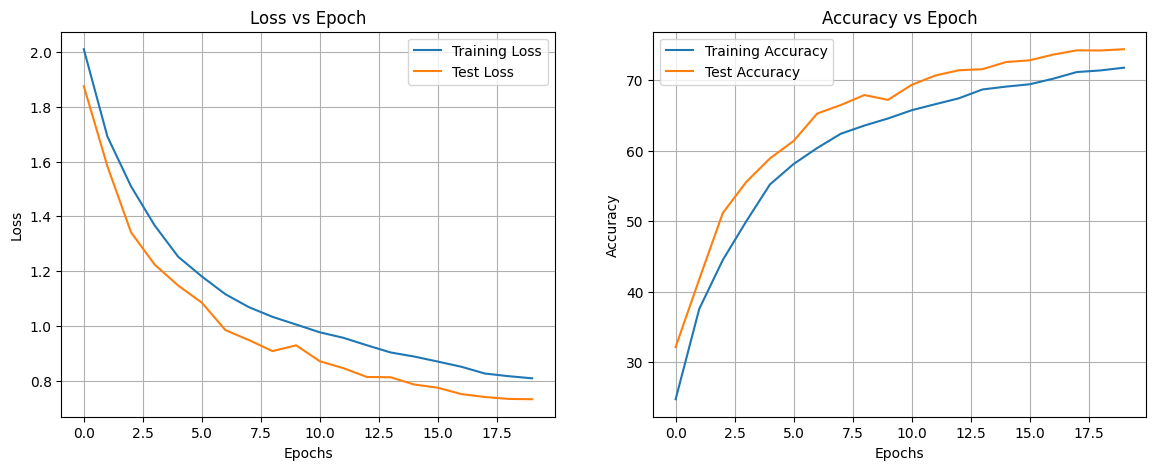

In [ ]:
trainer.plot_history()

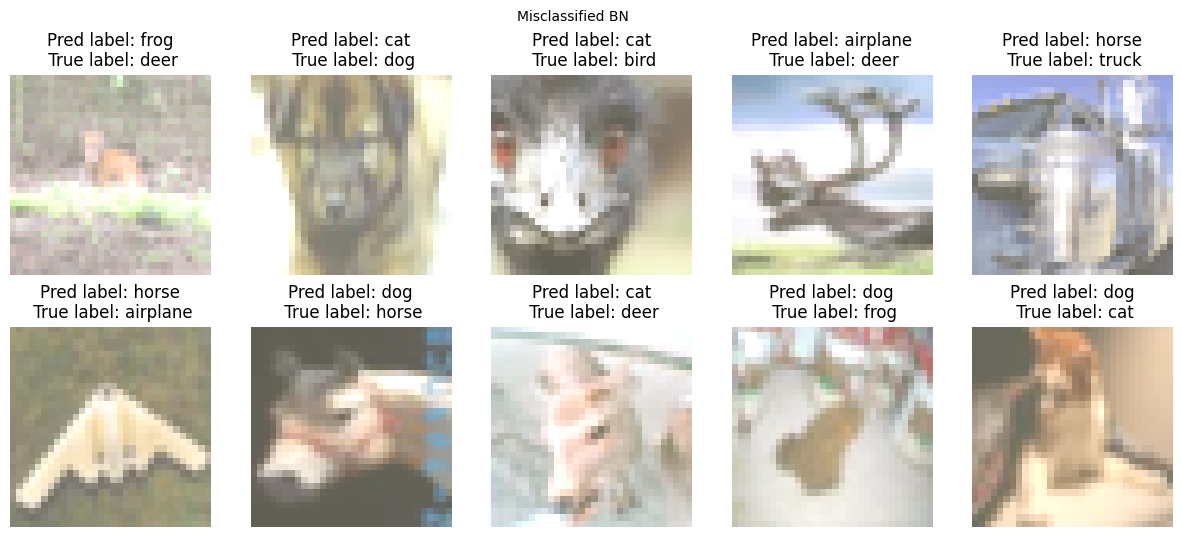

In [ ]:
plot_misclassified(
    model,
    test_loader,
    device,
    (0.49139968, 0.48215841, 0.44653091),
    (0.24703223, 0.24348513, 0.26158784),
)